In [ ]:
pip install polars

In [ ]:
from google.colab import files

# Subir archivo(s) .wav desde tu computadora
uploaded = files.upload()

# Mostrar nombres de archivos subidos
for fname in uploaded.keys():
    print(f"Archivo subido: {fname}")

Saving listings.csv to listings.csv
Archivo subido: listings.csv


In [ ]:
import polars as pl
import numpy as np


In [ ]:



file_path = "/content/listings.csv"  # Ajusta si el archivo tiene otra ruta

# Cargar la base de datos con Polars
df = pl.read_csv(file_path)

# Información general
print(f"Número de filas: {df.height}")
print(f"Número de columnas: {df.width}")

# Mostrar algunas columnas
print("\nColumnas de ejemplo:", df.columns[:5])

# Mostrar las primeras 5 filas
print("\nPrimeras filas:")
print(df.head(5))


Número de filas: 18187
Número de columnas: 79

Columnas de ejemplo: ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source']

Primeras filas:
shape: (90, 79)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ id      ┆ listing_ur ┆ scrape_id ┆ last_scra ┆ … ┆ calculate ┆ calculate ┆ calculate ┆ reviews_p │
│ ---     ┆ l          ┆ ---       ┆ ped       ┆   ┆ d_host_li ┆ d_host_li ┆ d_host_li ┆ er_month  │
│ i64     ┆ ---        ┆ i64       ┆ ---       ┆   ┆ stings_co ┆ stings_co ┆ stings_co ┆ ---       │
│         ┆ str        ┆           ┆ str       ┆   ┆ unt…      ┆ unt…      ┆ unt…      ┆ f64       │
│         ┆            ┆           ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆           │
│         ┆            ┆           ┆           ┆   ┆ i64       ┆ i64       ┆ i64       ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 11156   ┆ https://ww ┆ 20250

In [ ]:
# Filtrar filas donde 'price' es nulo
nulos_price = df.filter(pl.col("price").is_null())

# Mostrar cuántos hay y las primeras filas
print(f"Filas con price nulo: {nulos_price.height}")
print(nulos_price.head())


Filas con price nulo: 2453
shape: (5, 79)
┌─────────┬────────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬───────────┐
│ id      ┆ listing_ur ┆ scrape_id ┆ last_scra ┆ … ┆ calculate ┆ calculate ┆ calculate ┆ reviews_p │
│ ---     ┆ l          ┆ ---       ┆ ped       ┆   ┆ d_host_li ┆ d_host_li ┆ d_host_li ┆ er_month  │
│ i64     ┆ ---        ┆ i64       ┆ ---       ┆   ┆ stings_co ┆ stings_co ┆ stings_co ┆ ---       │
│         ┆ str        ┆           ┆ str       ┆   ┆ unt…      ┆ unt…      ┆ unt…      ┆ f64       │
│         ┆            ┆           ┆           ┆   ┆ ---       ┆ ---       ┆ ---       ┆           │
│         ┆            ┆           ┆           ┆   ┆ i64       ┆ i64       ┆ i64       ┆           │
╞═════════╪════════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪═══════════╡
│ 2047261 ┆ https://ww ┆ 202506100 ┆ 2025-06-1 ┆ … ┆ 1         ┆ 0         ┆ 0         ┆ 0.71      │
│         ┆ w.airbnb.c ┆ 32053     ┆ 7         ┆ 

In [ ]:
# Mostrar solo la columna 'price'
print(df.select("price"))


shape: (18_187, 1)
┌─────────┐
│ price   │
│ ---     │
│ str     │
╞═════════╡
│ $65.00  │
│ $99.00  │
│ $140.00 │
│ $179.00 │
│ $109.00 │
│ …       │
│ $121.00 │
│ $134.00 │
│ $120.00 │
│ $75.00  │
│ $121.00 │
└─────────┘


In [ ]:
df = df.with_columns(pl.col("price").str.replace_all(r"[\$,]", "").cast(pl.Float64))

In [ ]:
print(df.select("price"))


shape: (18_187, 1)
┌───────┐
│ price │
│ ---   │
│ f64   │
╞═══════╡
│ 65.0  │
│ 99.0  │
│ 140.0 │
│ 179.0 │
│ 109.0 │
│ …     │
│ 121.0 │
│ 134.0 │
│ 120.0 │
│ 75.0  │
│ 121.0 │
└───────┘


/tmp/ipython-input-2056445118.py:4: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  data=df.group_by(col).count().sort("count", descending=True).head(10).to_pandas(),


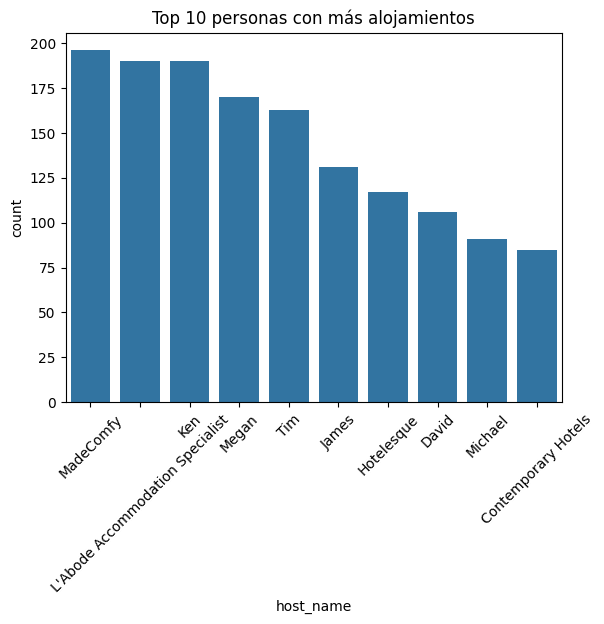

In [ ]:

# Personas
col = "host_name" if "host_name" in df.columns else "host_id"
sns.barplot(
    data=df.group_by(col).count().sort("count", descending=True).head(10).to_pandas(),
    x=col, y="count"
).set(title="Top 10 personas con más alojamientos")
plt.xticks(rotation=45)
plt.show()


In [ ]:
precio_promedio = df.select(pl.col("price").sum()).item() / df.height
print("Precio promedio:", precio_promedio)


Precio promedio: 293.68263045032165


In [ ]:
tipos = (
    df.group_by("room_type")
      .count()
      .sort("count", descending=True)
      .to_pandas()
)
print(tipos)


         room_type  count
0  Entire home/apt  14479
1     Private room   3591
2       Hotel room     83
3      Shared room     34


/tmp/ipython-input-734713457.py:3: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .count()


                   Colonia  Total_Alojamientos
0                     None                9953
1  Neighborhood highlights                8234


/tmp/ipython-input-1794461881.py:3: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .count()


In [ ]:
# Detectar columna de colonia disponible
candidatas = ["neighbourhood_cleansed", "neighbourhood_group_cleansed",
              "neighbourhood", "neighborhood"]
col = next(c for c in candidatas if c in df.columns)

# Limpiar, filtrar y contar
top_colonias = (
    df.with_columns(pl.col(col).cast(pl.Utf8).str.strip_chars().alias(col))
      .filter(
          pl.col(col).is_not_null() &
          (pl.col(col) != "") &
          (pl.col(col).str.to_lowercase() != "neighborhood highlights")
      )
      .group_by(col)
      .len()
      .sort("len", descending=True)
      .rename({col: "Colonia", "len": "Total_Alojamientos"})
)

# Imprimir en formato "Colonia : Total"
for r in top_colonias.iter_rows(named=True):
    print(f"{r['Colonia']} : {r['Total_Alojamientos']}")


Sydney : 4259
Waverley : 1670
Randwick : 1002
Pittwater : 916
Warringah : 863
Manly : 846
North Sydney : 717
Woollahra : 566
Sutherland Shire : 496
Marrickville : 496
Auburn : 468
Ryde : 403
Botany Bay : 398
Leichhardt : 374
Hornsby : 368
Rockdale : 366
Parramatta : 341
Blacktown : 312
The Hills Shire : 304
Willoughby : 278
Canada Bay : 258
Mosman : 257
Ku-Ring-Gai : 227
Bankstown : 205
Liverpool : 195
Penrith : 193
Canterbury : 162
Fairfield : 158
Strathfield : 148
Burwood : 145
Holroyd : 128
Lane Cove : 127
Ashfield : 126
Campbelltown : 102
City Of Kogarah : 102
Camden : 95
Hurstville : 95
Hunters Hill : 21


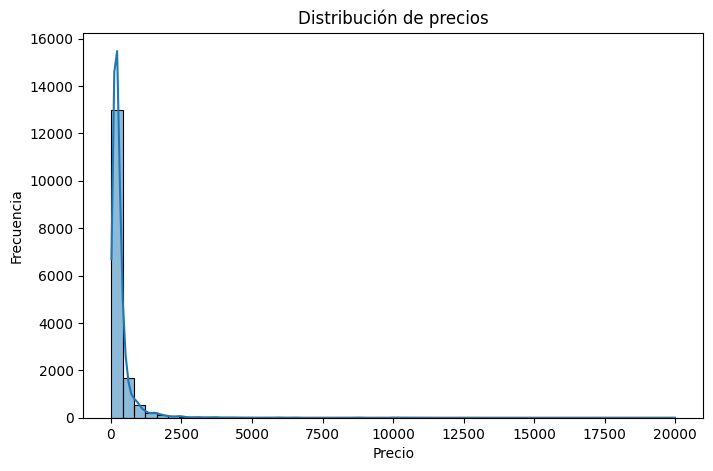

In [ ]:

# Convertir a pandas solo la columna price
df_precios = df.select("price").to_pandas()

# Graficar histograma
plt.figure(figsize=(8,5))
sns.histplot(df_precios["price"], bins=50, kde=True)
plt.title("Distribución de precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


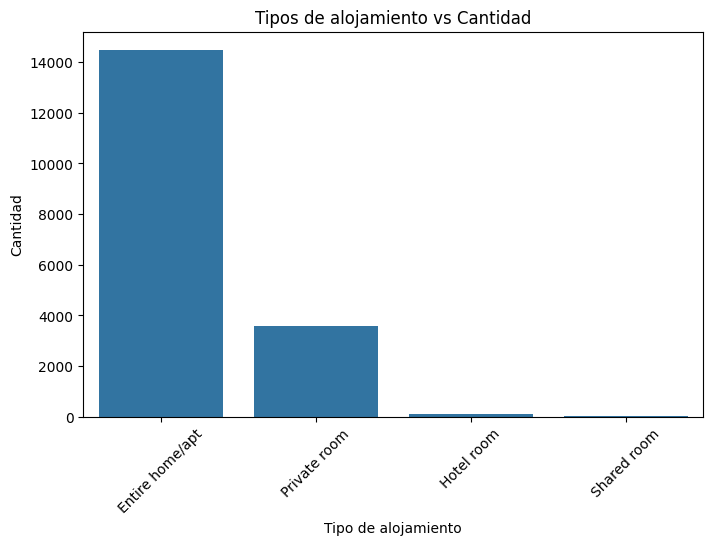

In [ ]:

# Agrupar y convertir a pandas
tipos = (
    df.group_by("room_type")
      .len()
      .sort("len", descending=True)
      .rename({"room_type": "Tipo de alojamiento", "len": "Cantidad"})
      .to_pandas()
)

# Gráfica de barras
plt.figure(figsize=(8,5))
sns.barplot(data=tipos, x="Tipo de alojamiento", y="Cantidad")
plt.title("Tipos de alojamiento vs Cantidad")
plt.xticks(rotation=45)
plt.show()


/tmp/ipython-input-1528991378.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_colonias, y="Colonia", x="Total_Alojamientos", palette="viridis")


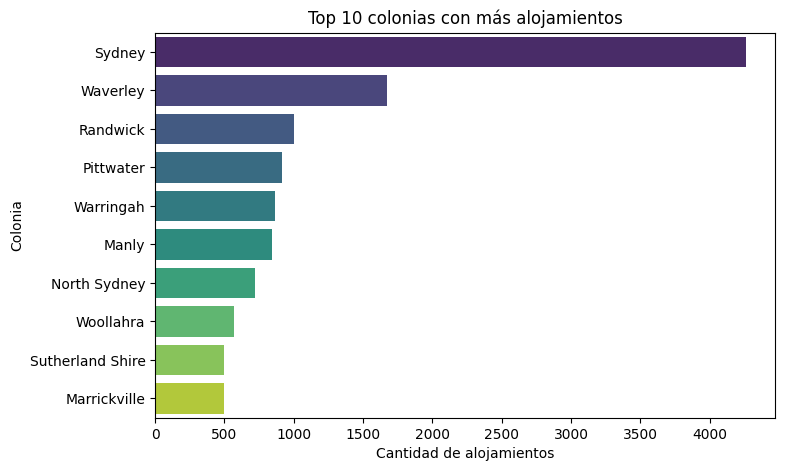

In [ ]:
# Tomar solo el Top 10 y pasarlo a pandas
top10_colonias = top_colonias.head(10).to_pandas()

# Gráfica de barras horizontal
plt.figure(figsize=(8,5))
sns.barplot(data=top10_colonias, y="Colonia", x="Total_Alojamientos", palette="viridis")
plt.title("Top 10 colonias con más alojamientos")
plt.xlabel("Cantidad de alojamientos")
plt.ylabel("Colonia")
plt.show()


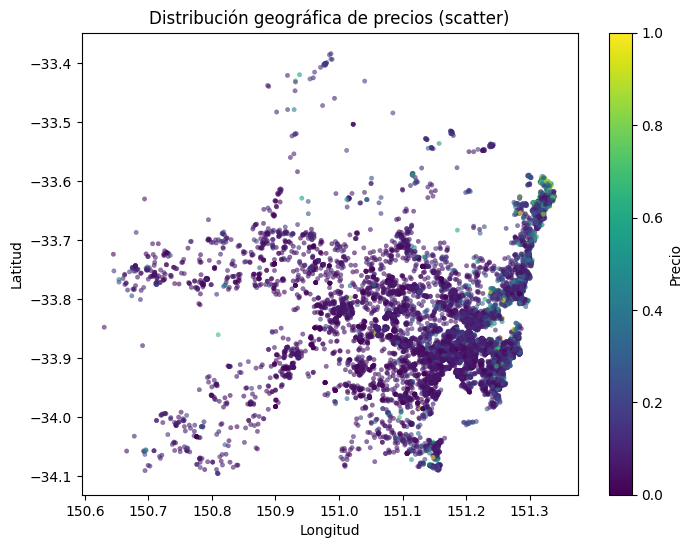

In [ ]:

# Tomar columnas y limpiar
geo = df.select(["longitude", "latitude", "price"]).to_pandas().dropna()

# Recortar outliers de precio (p.ej. percentil 99)
p99 = np.percentile(geo["price"], 99)
geo = geo[geo["price"] <= p99]

# Scatter coloreado por precio
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=geo, x="longitude", y="latitude",
    hue="price", palette="viridis", s=10, alpha=0.6, edgecolor=None, legend=False
)
plt.title("Distribución geográfica de precios (scatter)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
cb = plt.colorbar(plt.cm.ScalarMappable(cmap="viridis"),
                  ax=plt.gca(), label="Precio")
plt.show()